In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("desalegngeb/students-exam-scores")

print("Path to dataset files:", path)

100%|██████████| 695k/695k [00:00<00:00, 1.12MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/desalegngeb/students-exam-scores/versions/2


In [6]:

import os

# Show available files again (just to be sure)
print(os.listdir(path))

# Load one of the available files
df = pd.read_csv(os.path.join(path, "Expanded_data_with_more_features.csv"))

# Display first few rows
df.head()


['Expanded_data_with_more_features.csv', 'Original_data_with_more_rows.csv']


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [11]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [12]:
df['WklyStudyHours']=df['WklyStudyHours'].str.replace("05-Oct","5 - 10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


**GENDER DISTRIBUTION**

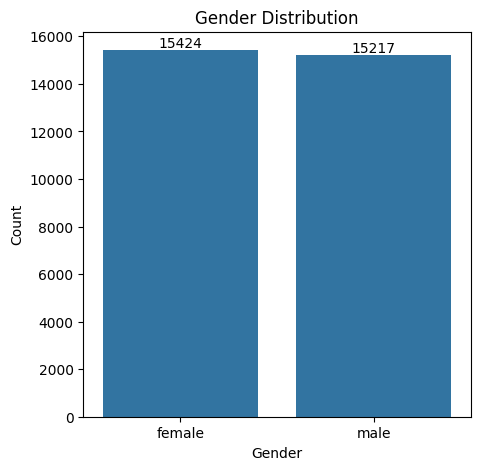

In [15]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

number of males and females  in the data are 15217 and 15424 respectively

In [16]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


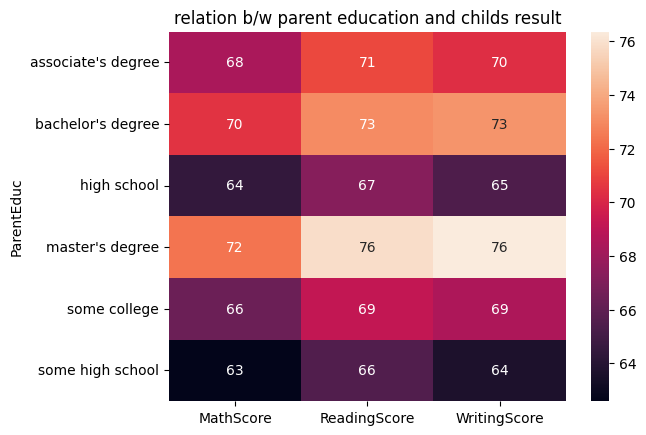

In [24]:
sns.heatmap(gb,annot=True)
plt.title("relation b/w parent education and childs result")
plt.show()

Students whose parents have higher education levels tend to score better in math, reading, and writing.

In [22]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


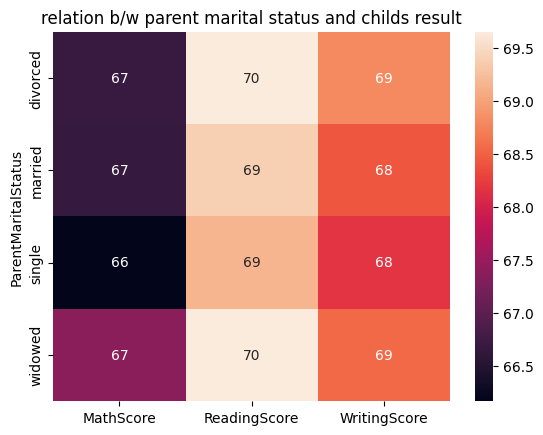

In [25]:
sns.heatmap(gb1,annot=True)
plt.title("relation b/w parent marital status and childs result")
plt.show()

Students' scores in math, reading, and writing are fairly consistent across all parental marital statuses, with slight variations showing the highest average scores among children of widowed parents.

In [26]:
gb2 = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


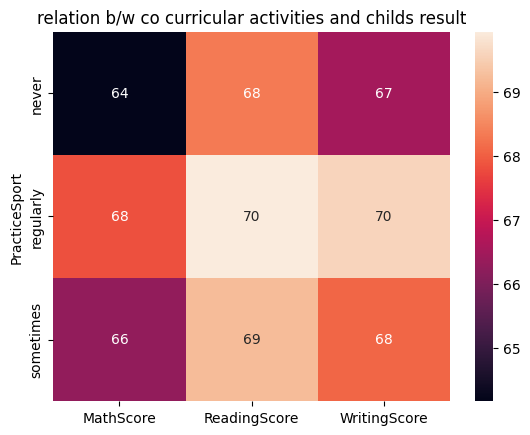

In [27]:
sns.heatmap(gb2,annot=True)
plt.title("relation b/w co curricular activities and childs result")
plt.show()

In [28]:
gb3 = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


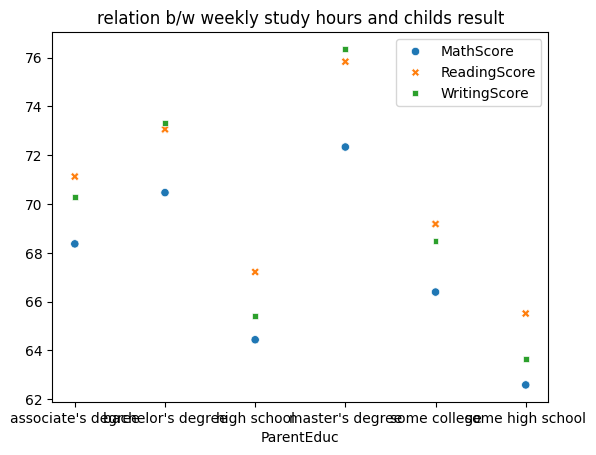

In [32]:
sns.scatterplot(gb)
plt.title("relation b/w weekly study hours and childs result")
plt.show()


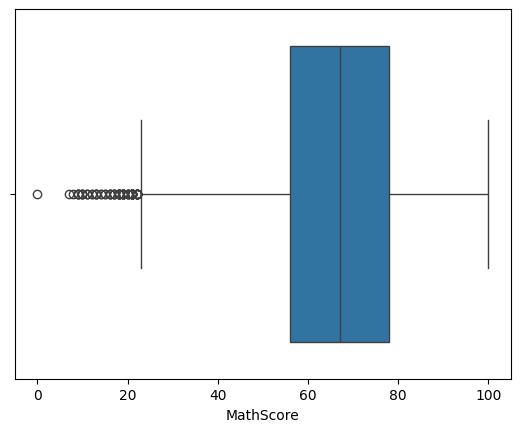

In [34]:
sns.boxplot(data = df,  x= "MathScore" )
plt.show()

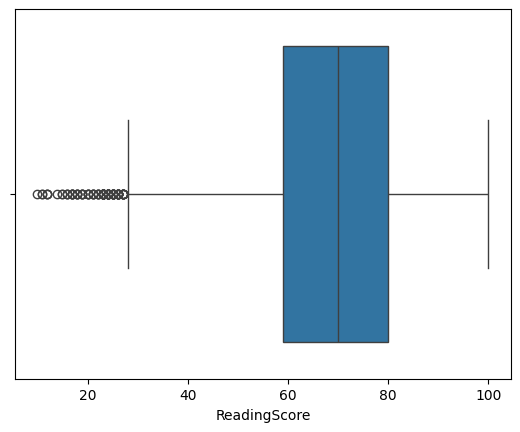

In [35]:
sns.boxplot(data = df,  x= "ReadingScore" )
plt.show()

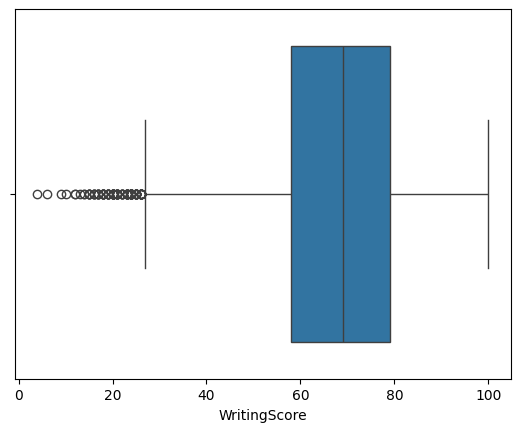

In [36]:
sns.boxplot(data = df,  x= "WritingScore" )
plt.show()

maths showing high number of out-liers which means student finds maths a bit difficult as compared to reading and writing


In [39]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


**Distribution of ethnic group**

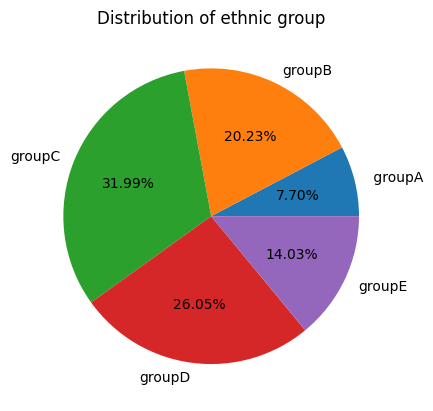

In [47]:
groupA = df[df['EthnicGroup'] == 'group A'].count()
groupB = df[df['EthnicGroup'] == 'group B'].count()
groupC = df[df['EthnicGroup'] == 'group C'].count()
groupD = df[df['EthnicGroup'] == 'group D'].count()
groupE = df[df['EthnicGroup'] == 'group E'].count()
l = [" groupA", "groupB" ,"groupC" ,"groupD" ,"groupE" ]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist , labels = l , autopct = "%1.2f%%")
plt.title("Distribution of ethnic group")
plt.show()

[Text(0, 0, '15424'), Text(0, 0, '15217')]

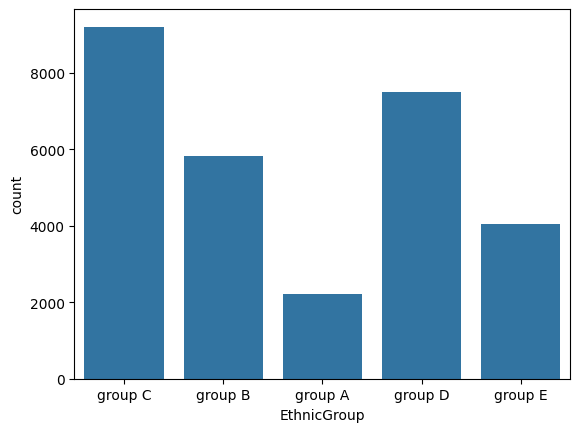

In [50]:
sns.countplot(x='EthnicGroup', data=df)
ax.bar_label(ax.containers[0])


**conclusion**
Parental education significantly impacts student performance, with higher education levels linked to better scores. While factors like marital status, activities, and study habits show minor correlations, their influence is less pronounced. Ethnic group distribution highlights potential disparities, and outlier analysis reveals math as a subject with varying performance levels. Further statistical validation and deeper exploration are recommended to strengthen these findings and inform targeted educational strategies.

I believe this version provides a more comprehensive view with the inclusion of facts and figures. Let me know if you need any further refinement or clarification.